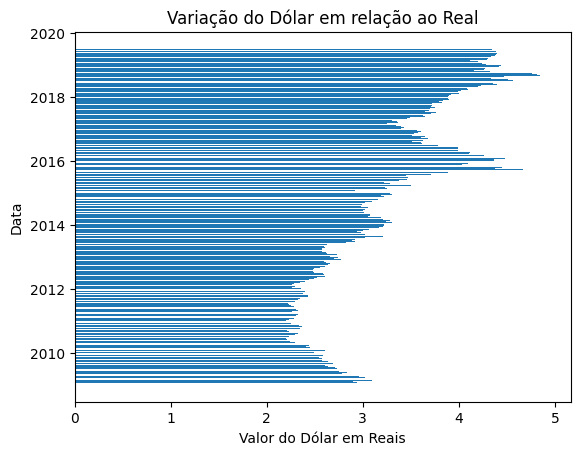

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dados = pd.read_csv('EUR_BRL_2009-2019.csv')

# Converter a coluna de datas para o formato datetime e a de EURBRL para float
dados['Date'] = pd.to_datetime(dados['Date'], format="%d/%m/%Y")
dados['EURBRL'] = dados['EURBRL'].replace(',', '.', regex=True).astype(float)


datas = dados['Date']
valores_euro = dados['EURBRL'].replace(',', '.', regex=True).astype(float)

# Criação do gráfico de linhas
plt.barh(datas, valores_euro)

# Labels do gráfico
plt.ylabel('Data')
plt.xlabel('Valor do Dólar em Reais')
plt.title('Variação do Dólar em relação ao Real')

plt.show()

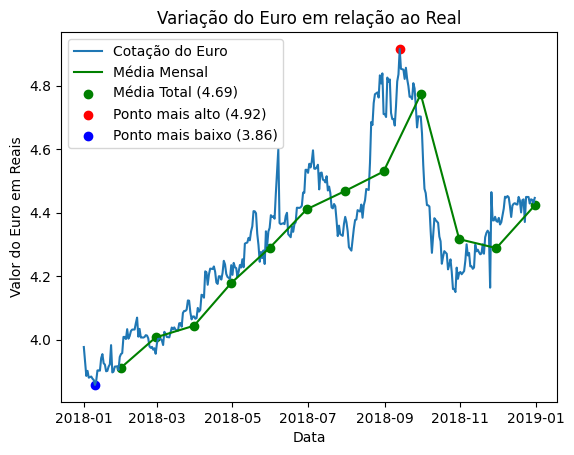

In [6]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import pandas as pd

dados = pd.read_csv('EUR_BRL_2009-2019.csv')

# Converter a coluna de datas para o formato datetime e a de EURBRL para float
dados['Date'] = pd.to_datetime(dados['Date'], format="%d/%m/%Y")
dados['EURBRL'] = dados['EURBRL'].replace(',', '.', regex=True).astype(float)

# Definir os intervalos de tempo desejados
data_inicio = '2018-01-01'
data_fim = '2018-12-31'

# Filtrar os dados dentro do intervalo de tempo
dados_filtrados = dados[(dados['Date'] >= data_inicio) & (dados['Date'] <= data_fim)]

# Agrupar os dados por mês e calcular a média mensal
dados_mensais = dados_filtrados.resample('M', on='Date').mean()

meses = relativedelta(datetime.strptime(data_fim, '%Y-%m-%d'), datetime.strptime(data_inicio, '%Y-%m-%d')).months

# Soma os valores e calcula a média
soma_media = 0
for valor in dados_mensais.EURBRL:
    soma_media += valor
media = (soma_media / meses)

# Acessar os dados filtrados
datas = dados_filtrados['Date']
valores_euro = dados_filtrados['EURBRL']

# Encontrar os pontos mais altos e mais baixos do euro
ponto_alto = dados_filtrados[valores_euro == valores_euro.max()]
ponto_baixo = dados_filtrados[valores_euro == valores_euro.min()]

# Criação do gráfico de linhas
plt.plot(datas, valores_euro, label='Cotação do Euro')
plt.plot(dados_mensais.index, dados_mensais['EURBRL'], color='green', label='Média Mensal')

# Adicionar os pontos mais altos e mais baixos
plt.scatter(dados_mensais.index, dados_mensais['EURBRL'], color='green', label='Média Total (' + str(round(media, 2)) + ')')
plt.scatter(ponto_alto['Date'], ponto_alto['EURBRL'], color='red', label='Ponto mais alto (' + str(round(ponto_alto.iloc[0]["EURBRL"], 2)) + ')')
plt.scatter(ponto_baixo['Date'], ponto_baixo['EURBRL'], color='blue', label='Ponto mais baixo (' + str(round(ponto_baixo.iloc[0]["EURBRL"], 2)) + ')')

# Labels do gráfico
plt.xlabel('Data')
plt.ylabel('Valor do Euro em Reais')
plt.title('Variação do Euro em relação ao Real')
plt.legend()

plt.show()


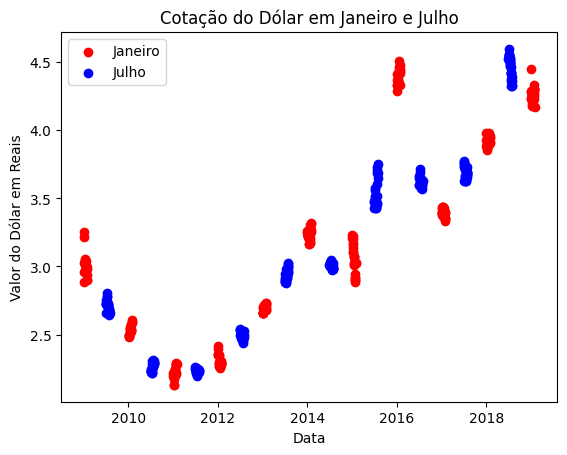

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

dados = pd.read_csv('EUR_BRL_2009-2019.csv')

# Converter a coluna de datas para o formato datetime e a de EURBRL para float
dados['Date'] = pd.to_datetime(dados['Date'], format="%d/%m/%Y")
dados['EURBRL'] = dados['EURBRL'].replace(',', '.', regex=True).astype(float)

# Filtrar os dados apenas para os meses de Janeiro e Julho
dados_janeiro = dados[dados['Date'].dt.month == 1]
dados_julho = dados[dados['Date'].dt.month == 7]


# Acessar os dados filtrados
datas_janeiro = dados_janeiro['Date']
valores_euro_janeiro = dados_janeiro['EURBRL']

datas_julho = dados_julho['Date']
valores_euro_julho = dados_julho['EURBRL']

# Criação do gráfico de dispersão
plt.scatter(datas_janeiro, valores_euro_janeiro, color='red', label='Janeiro')
plt.scatter(datas_julho, valores_euro_julho, color='blue', label='Julho')

# Labels do gráfico
plt.xlabel('Data')
plt.ylabel('Valor do Dólar em Reais')
plt.title('Cotação do Dólar em Janeiro e Julho')
plt.legend()
plt.show()
